<a href="https://colab.research.google.com/github/ClovisL/AnalyzeBuildingImages/blob/main/BuildingsImageAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict Score Of Uploaded Image (1-5)**

In [ ]:
!pip install gdown

In [ ]:
import gdown
url = f'https://drive.google.com/uc?id=1S3qifzM0SMtVQuO3q3DXaXPpRCfHr9Av'
output = 'Buildings.zip'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1S3qifzM0SMtVQuO3q3DXaXPpRCfHr9Av
From (redirected): https://drive.google.com/uc?id=1S3qifzM0SMtVQuO3q3DXaXPpRCfHr9Av&confirm=t&uuid=c93b4331-858b-4045-8bff-1a70ca93e9ef
To: /content/Buildings.zip
100%|██████████| 76.6M/76.6M [00:01<00:00, 45.0MB/s]


'Buildings.zip'

In [ ]:
import zipfile
with zipfile.ZipFile('Buildings.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
from google.colab import files
# Brings up the prompt to upload a file. Upload a valid image file
# If an error message appears, try enabling cookies for the site in your browser settings
uploaded_img = files.upload()

Saving 5841953535_dafa3e2244_z_d.jpg to 5841953535_dafa3e2244_z_d (1).jpg


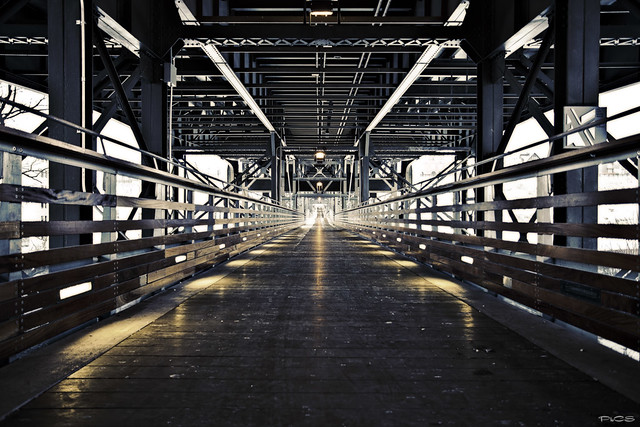

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
Predicted sentiment score for 5841953535_dafa3e2244_z_d (1).jpg: 1.9289696216583252


In [ ]:
# Prediction
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from IPython.display import display  # Import display for showing images (optional)

# Load the saved model
model = load_model('Buildings.keras')

# Assuming uploaded_img is the dictionary returned by files.upload()
# It should have the filename as the key and file content as the value
for fn in uploaded_img.keys():
    # Get the filename
    img_path = fn

    # Display the image
    display(image.load_img(img_path))

    # Load the image for prediction
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = tf.expand_dims(img_array, 0)

    # Make the prediction
    predictions = model.predict(img_array)
    print(f"Predicted sentiment score for {img_path}: {predictions[0][0]}")